In [ ]:
# Check GPU status
!nvidia-smi

Wed Nov 13 14:04:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [ ]:
dataset_path = "/content/drive/MyDrive/DL YoLoV11/Datasets"

In [ ]:
import os
import glob

# Define the path to your dataset on Google Drive
dataset_path = "/content/drive/MyDrive/DL YoLoV11/Datasets"

# List all files in the dataset path
all_files = glob.glob(os.path.join(dataset_path, '**'), recursive=True)

# Print each file path
for file in all_files:
    print(file)


/content/drive/MyDrive/DL YoLoV11/Datasets/
/content/drive/MyDrive/DL YoLoV11/Datasets/README.dataset.txt
/content/drive/MyDrive/DL YoLoV11/Datasets/README.roboflow.txt
/content/drive/MyDrive/DL YoLoV11/Datasets/data.yaml
/content/drive/MyDrive/DL YoLoV11/Datasets/test
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images/3_jpg.rf.28810e7e06812b3c2330d652ce85a58b.jpg
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images/17_jpg.rf.c1f6db21c30e03f99111fc4dd59b3635.jpg
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images/87_jpg.rf.9a8a8168571094ef9c98221ffcdb937b.jpg
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images/68_jpg.rf.81e83679f0ac411933b2dd4116e4818a.jpg
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images/image193_jpg.rf.06109f76f854c090d04e9e633fed5c1e.jpg
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images/39_jpg.rf.fb9dfae436f3bc73eae9cb1c7cc68682.jpg
/content/drive/MyDrive/DL YoLoV11/Datasets/test/images/27_

In [ ]:
import yaml

# Define the path to the data.yaml file
yaml_path = "/content/drive/MyDrive/DL YoLoV11/Datasets/data.yaml"

# Open and load the YAML file
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Display the contents
print(data)


{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 2, 'names': ['Human', 'animal-human-detection'], 'roboflow': {'workspace': 'majeed-0edkj', 'project': 'camouflage-xy3zl', 'version': 5, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/majeed-0edkj/camouflage-xy3zl/dataset/5'}}


In [ ]:
# Ensure you're in the HOME directory
%cd {HOME}

# Use YOLOv8 pretrained model for training
!yolo task=detect mode=train model=yolov8s.pt data="{dataset_path}/data.yaml" epochs=25 imgsz=640 plots=True

/content
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/DL YoLoV11/Datasets/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

In [ ]:
# YOLOv8 25 Epoch Model Summary and Metrics
from IPython.display import display, Markdown

# Updated model summary and performance metrics for 25 epochs
class_names = ["All", "Human"]
images = [23, 22]
instances = [25, 24]
box_p = [0.889, 0.778]
recall = [0.293, 0.586]
map50 = [0.376, 0.752]
map50_95 = [0.222, 0.443]

metrics_report = f"""
## YOLOv8 Model Metrics Summary (25 Epochs)

**Model:** YOLOv8 (25 Epochs)
**Parameters:** 11,126,358
**GFLOPs:** 28.4

### Class-Wise Performance
| Class                    | Images | Instances | Box(P) | Recall | mAP50  | mAP50-95 |
|--------------------------|--------|-----------|--------|--------|--------|----------|
| All                      | {images[0]}      | {instances[0]}         | {box_p[0]:.3f}   | {recall[0]:.3f}   | {map50[0]:.3f} | {map50_95[0]:.3f}   |
| Human                    | {images[1]}      | {instances[1]}         | {box_p[1]:.3f}   | {recall[1]:.3f}   | {map50[1]:.3f} | {map50_95[1]:.3f}   |

### Speed
- **Preprocess:** 0.2 ms per image
- **Inference:** 4.6 ms per image
- **Loss calculation:** 0.0 ms per image
- **Post-process:** 2.5 ms per image

### Results Location
Results saved to: `runs/detect/train3`
"""

# Display the metrics report
display(Markdown(metrics_report))


## YOLOv8 Model Metrics Summary (25 Epochs)

**Model:** YOLOv8 (25 Epochs)
**Parameters:** 11,126,358
**GFLOPs:** 28.4

### Class-Wise Performance
| Class                    | Images | Instances | Box(P) | Recall | mAP50  | mAP50-95 |
|--------------------------|--------|-----------|--------|--------|--------|----------|
| All                      | 23      | 25         | 0.889   | 0.293   | 0.376 | 0.222   |
| Human                    | 22      | 24         | 0.778   | 0.586   | 0.752 | 0.443   |

### Speed
- **Preprocess:** 0.2 ms per image
- **Inference:** 4.6 ms per image
- **Loss calculation:** 0.0 ms per image
- **Post-process:** 2.5 ms per image

### Results Location
Results saved to: `runs/detect/train3`


In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    P_curve.png		train_batch136.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch137.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1731507270.67ecb26efe2a.4596.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch135.jpg	weights


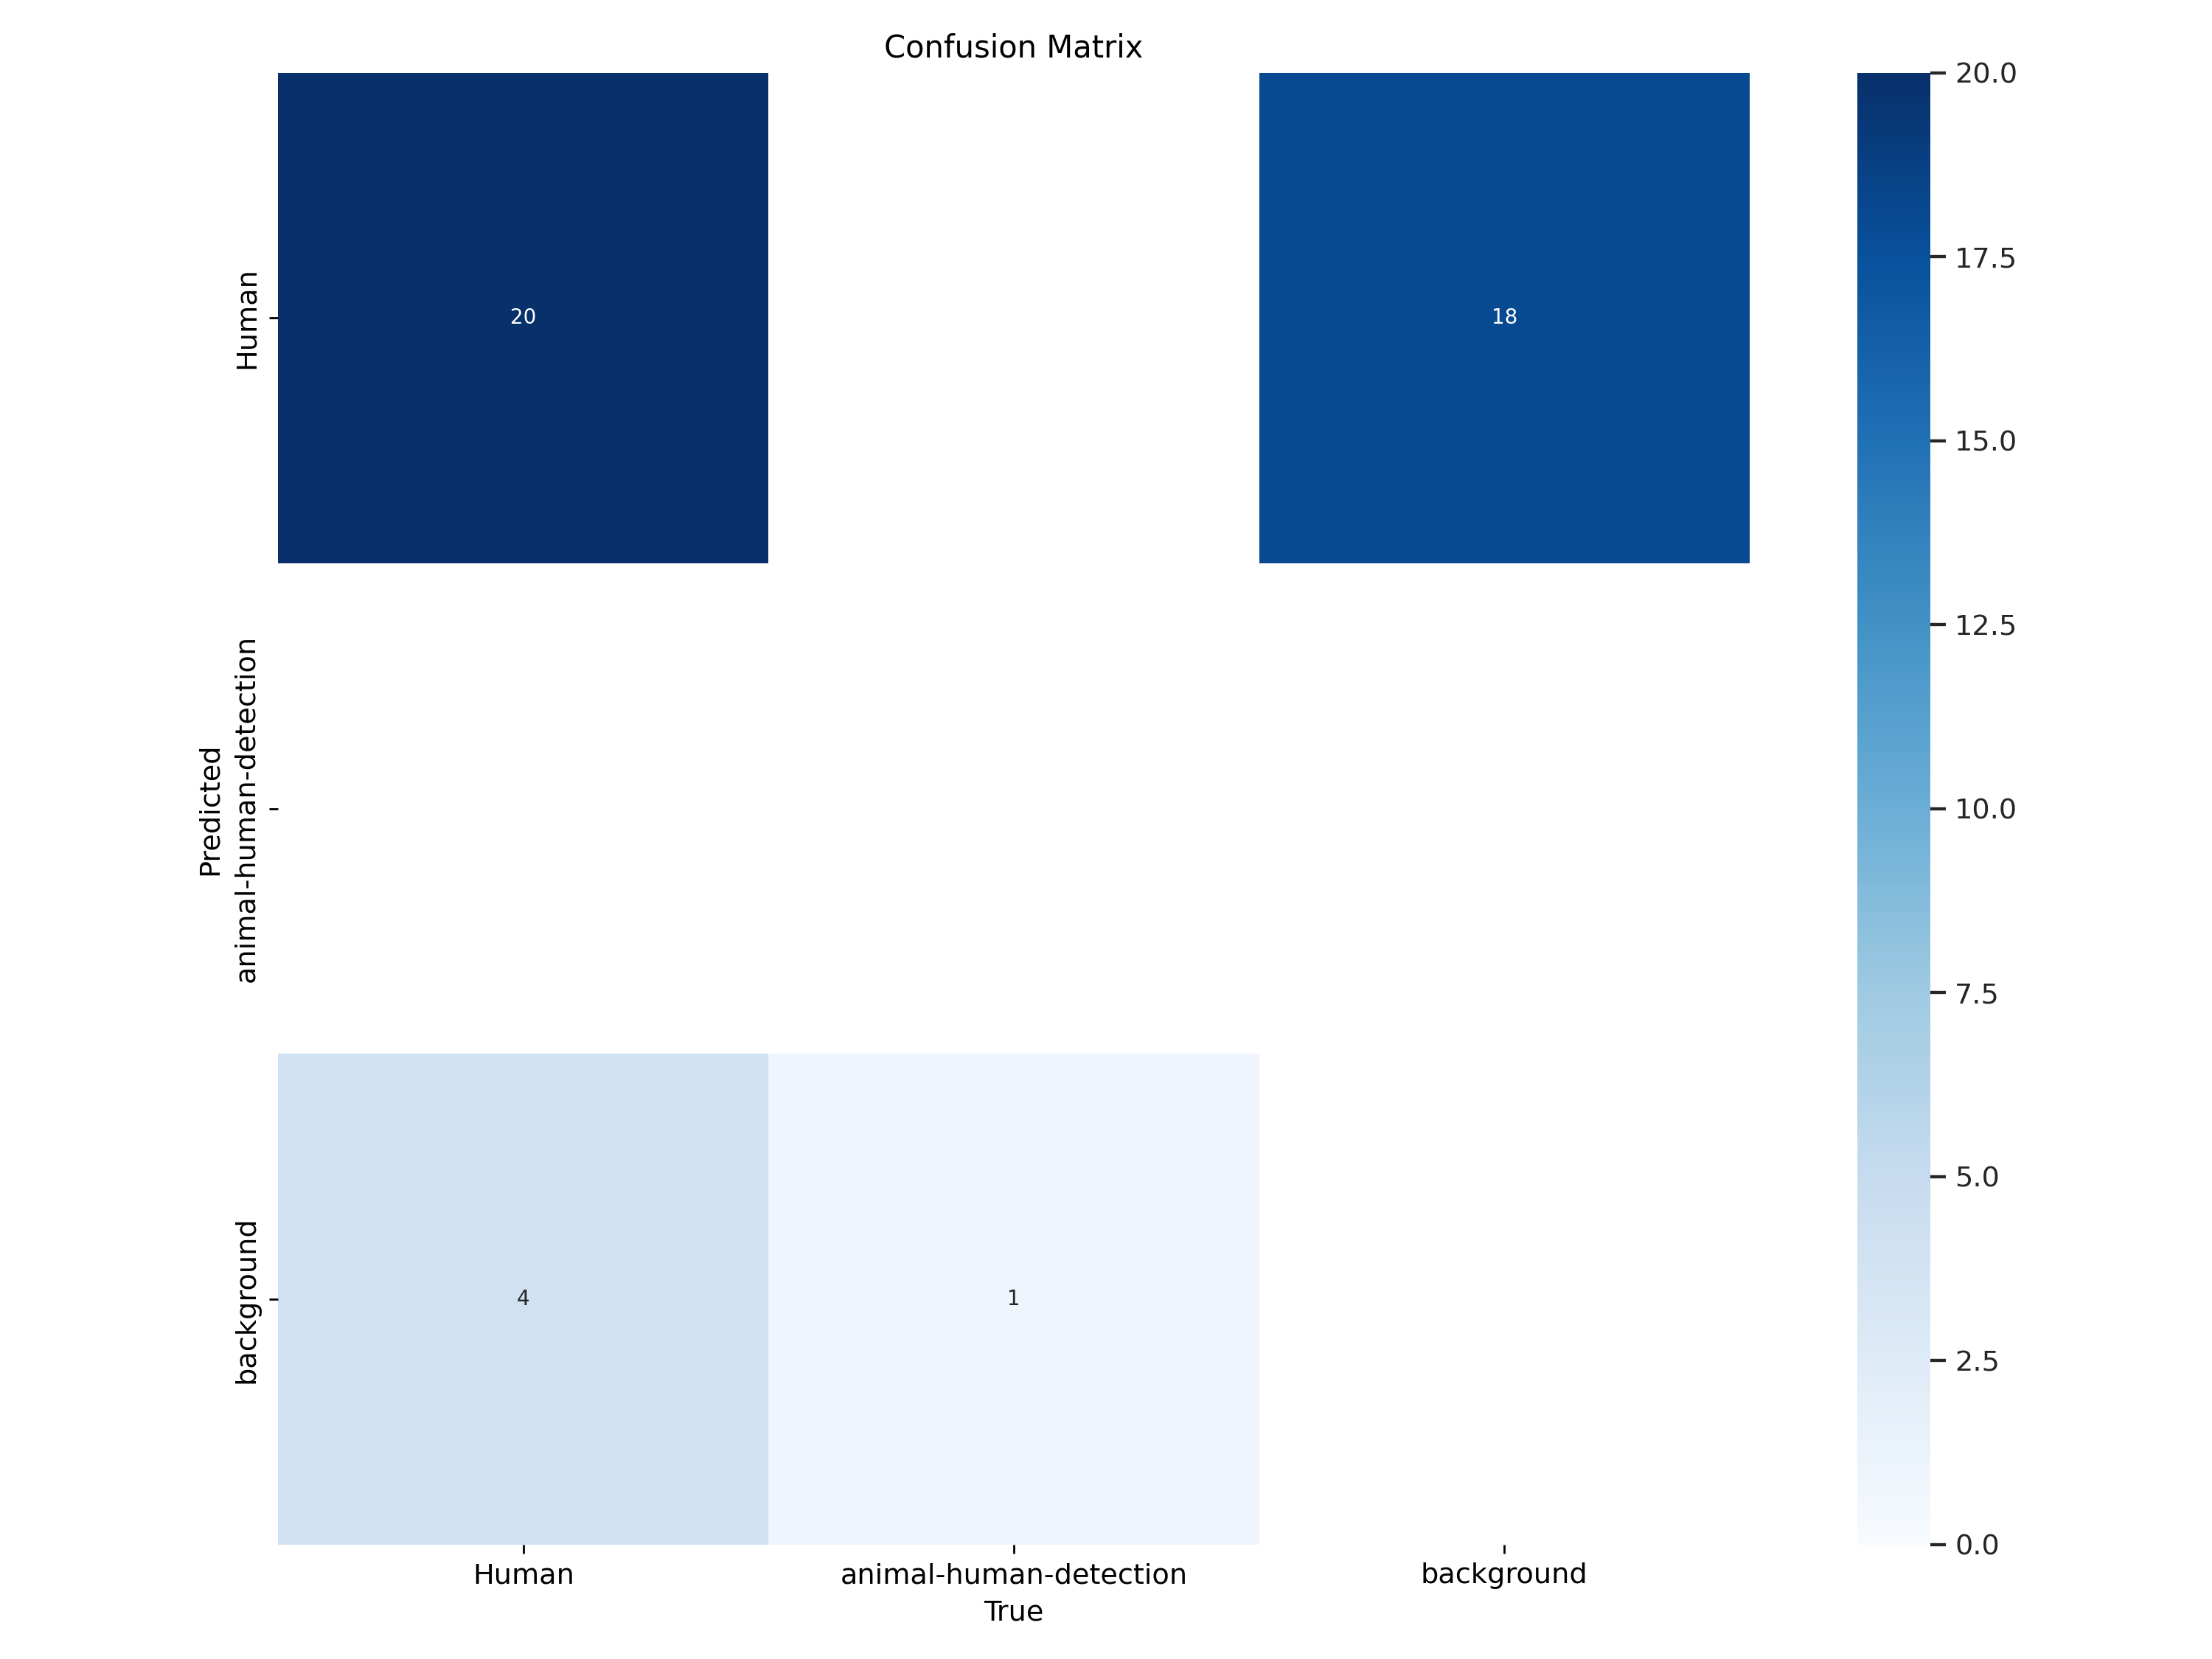

In [ ]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

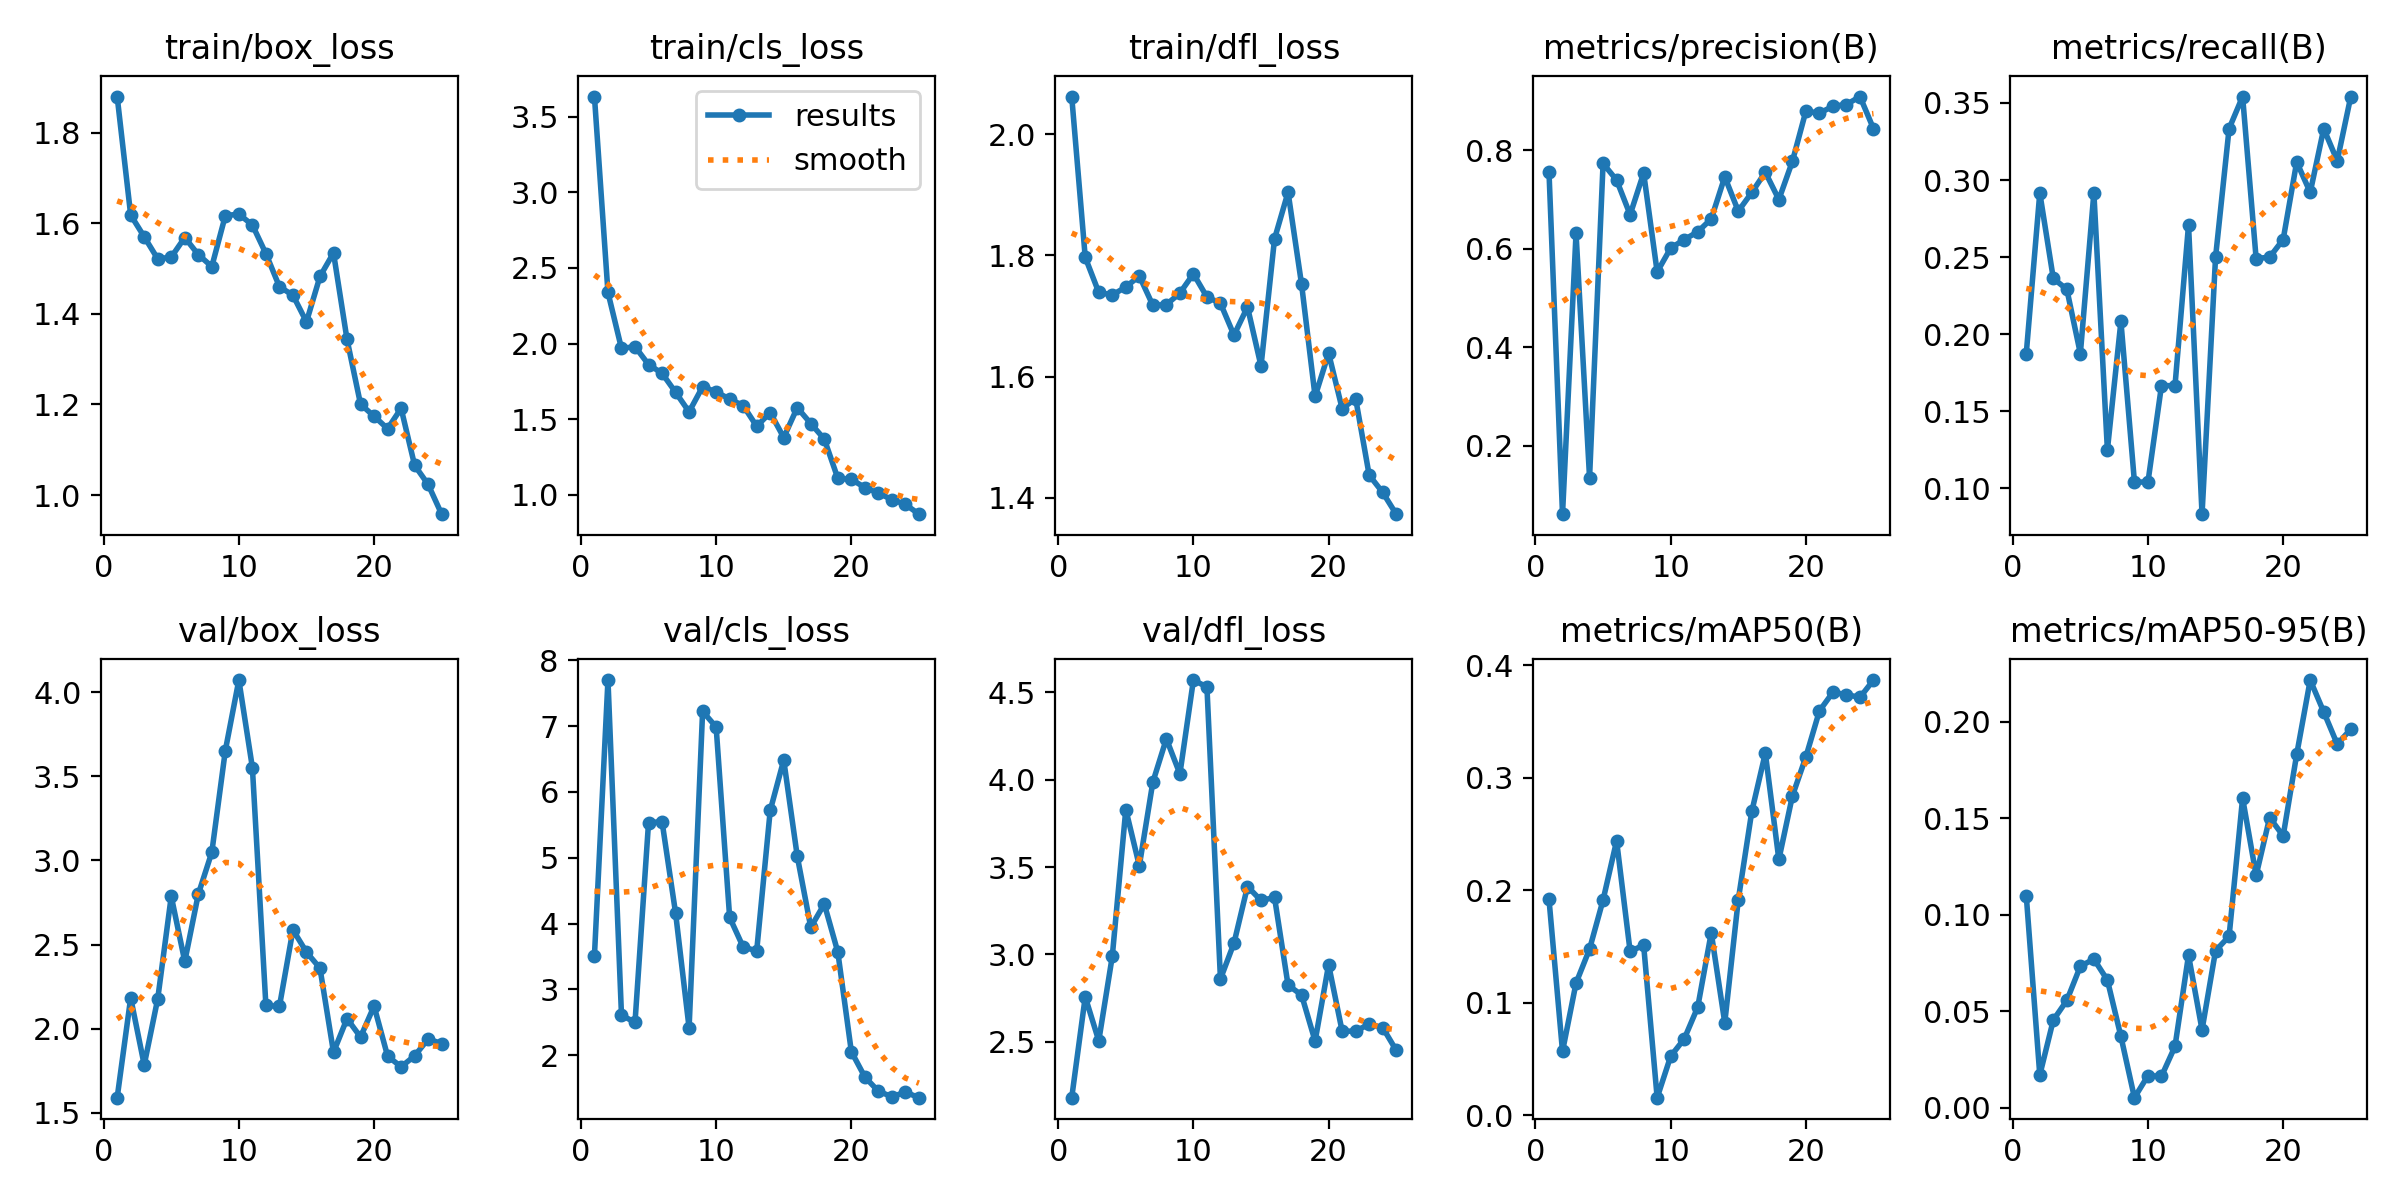

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

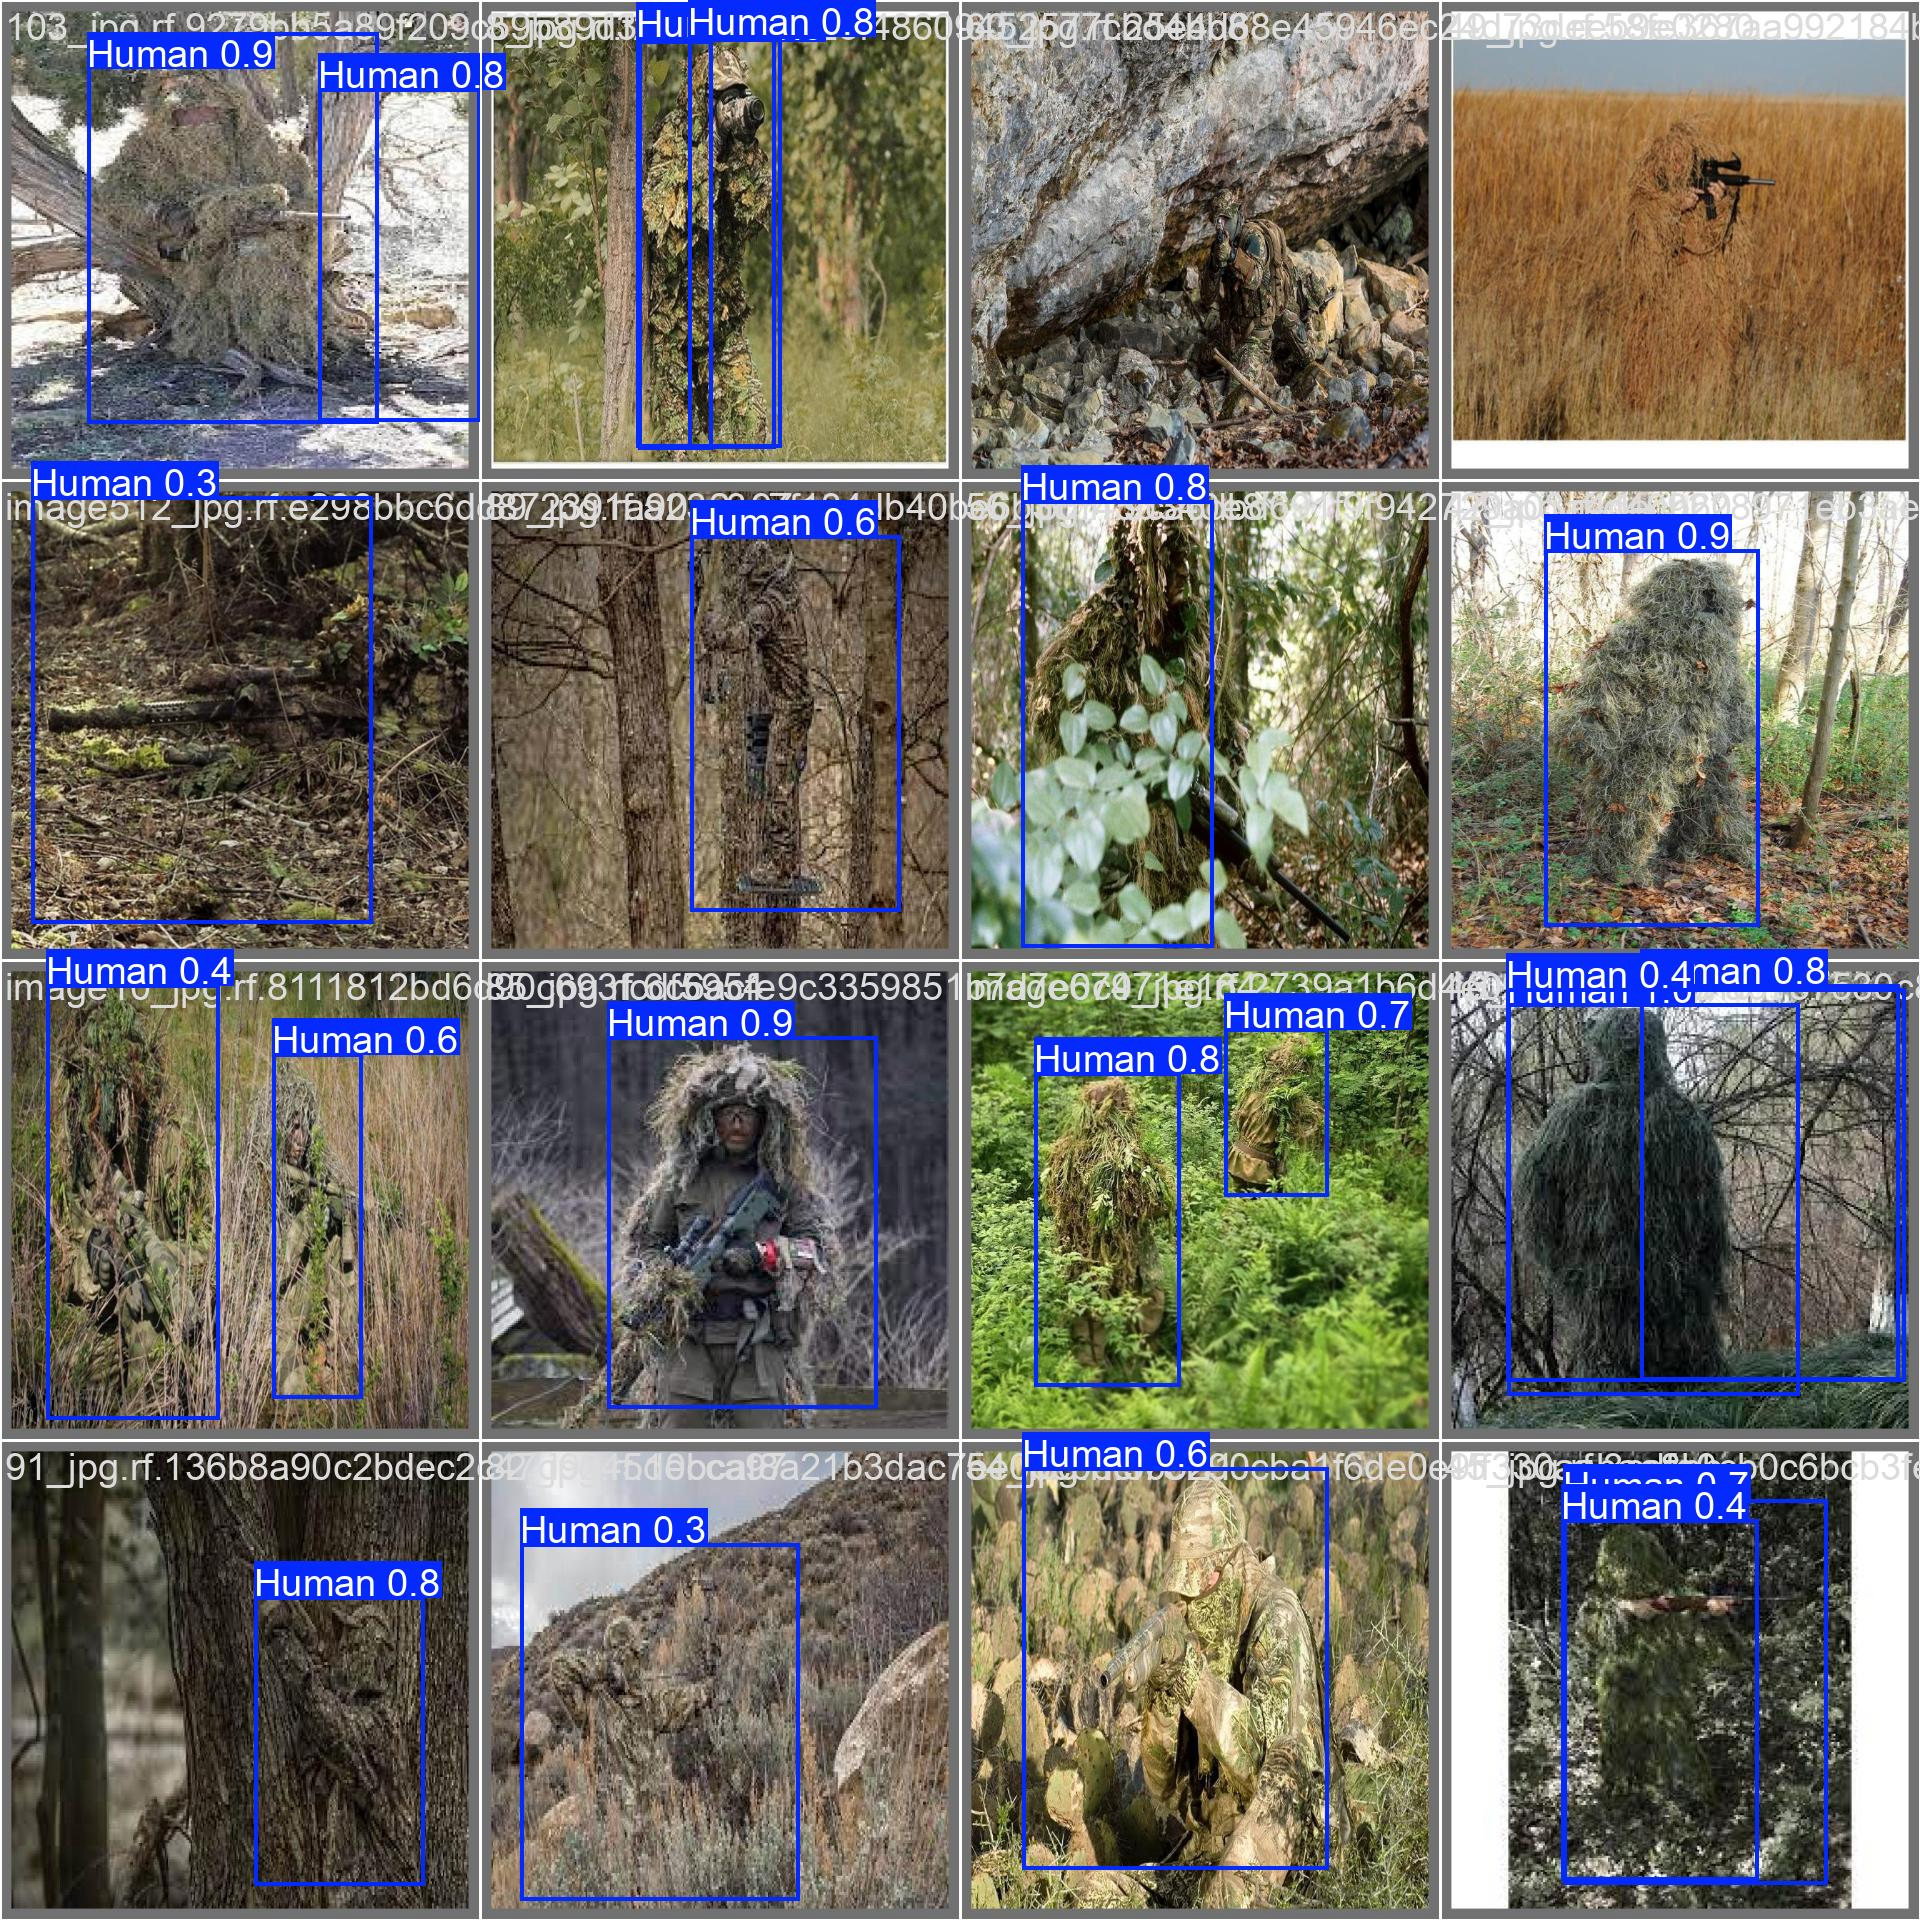

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data="{dataset_path}/data.yaml"

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/DL YoLoV11/Datasets/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 25. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.45it/s]
                   all         23         25      0.786      0.333      0.321      0.156
                 Human         22         24      0.572      0.667      0.642      0.311
animal-human-detection          1          1          1          0          0          0
Speed: 0.3ms preprocess, 19.1ms

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="{dataset_path}/test/images" save=True

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/12 /content/drive/MyDrive/DL YoLoV11/Datasets/test/images/108_jpg.rf.f906e2e829c820df9f847695cb3012be.jpg: 640x640 2 Humans, 19.7ms
image 2/12 /content/drive/MyDrive/DL YoLoV11/Datasets/test/images/17_jpg.rf.c1f6db21c30e03f99111fc4dd59b3635.jpg: 640x640 5 Humans, 16.4ms
image 3/12 /content/drive/MyDrive/DL YoLoV11/Datasets/test/images/27_jpg.rf.4f6c607e951a67a63e20666266914722.jpg: 640x640 2 Humans, 16.3ms
image 4/12 /content/drive/MyDrive/DL YoLoV11/Datasets/test/images/38_jpg.rf.7a31ab5c5b9c4b178047bd7ea82f278f.jpg: 640x640 1 Human, 16.2ms
image 5/12 /content/drive/MyDrive/DL YoLoV11/Datasets/test/images/39_jpg.rf.fb9dfae436f3bc73eae9cb1c7cc68682.jpg: 640x640 1 Human, 16.2ms
image 6/12 /content/drive/MyDrive/DL YoLoV11/Datasets/test/images/3_jpg.rf.28810e7e06812b3c2330d652ce85a58b.jpg: 640x640 (no detections), 16

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

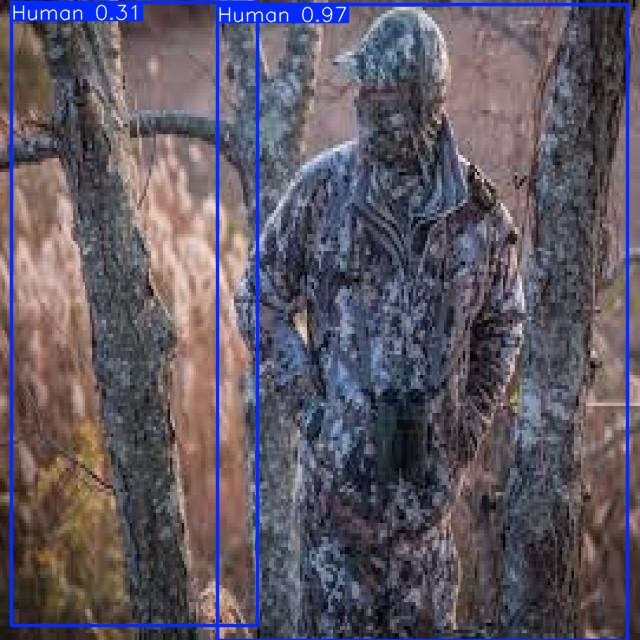

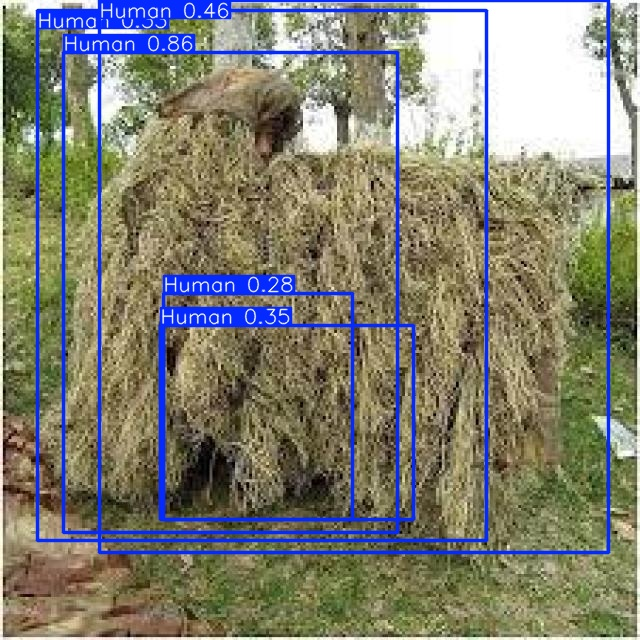

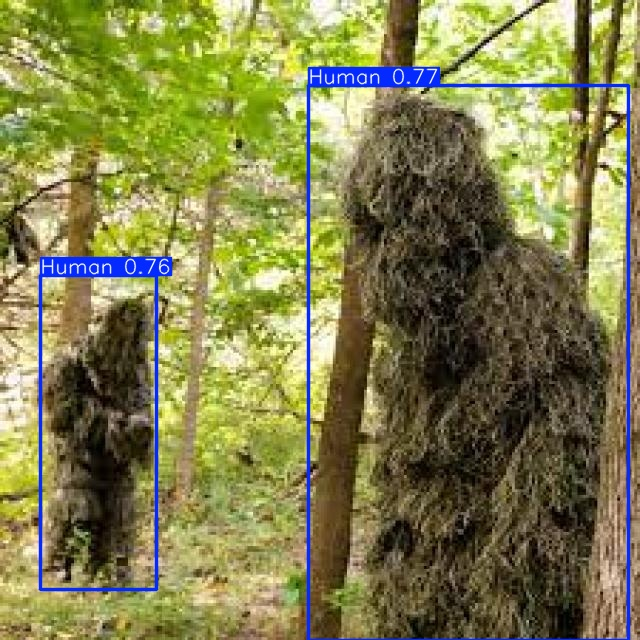

In [ ]:
latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

**Custom Image Testing**